In [1]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
datos = pd.read_csv('Mall_Customers.csv')
#datos = np.genfromtxt('Mall_Customers.csv', delimiter=',', skip_header=1)
# Se seguirá la metodología encnotrada en:
# https://www.jacobsoft.com.mx/es_mx/k-means-clustering-con-python/
# MÉTODO DEL CODO
# En adelante, todo lo que sigue es adaptado de allí, para las columnas 2 y 4

In [7]:
X = datos.iloc[:, [2, 4]].values
X

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

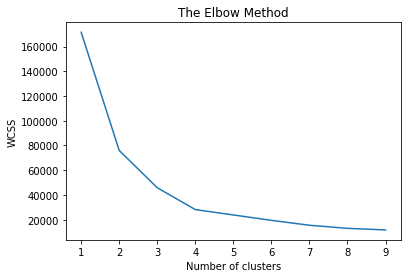

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# En el bloque anterior, generamos los clusters para valores de 1 a 10 (en el rango de 1 a 11)
# y obtenemos para cada uno de ellos, la suma de las distancias con el tributo inertia_ del objeto kmeans.

# Grafica de la suma de las distancias
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [11]:
# Aparentemente para estas 2 columnas el problema converge con 4 clusters
# Creando el k-Means para los 4 grupos encontrados

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# la variable y_kmeans guarda los grupos que corresponden a cada renglón de la muestra de datos,
# lo que significa que cada registro que corresponde a un cliente,
# esta asignado a uno de cinco grupos que van de 0 a 3

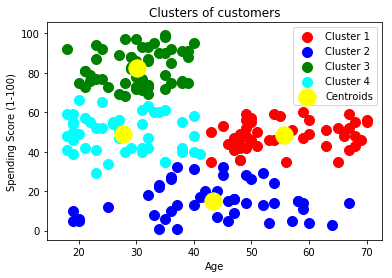

In [12]:
# Visualizacion grafica de los clusters

# Para poder observar gráficamente la asignación de los 200 clientes a 5 grupos o clusters realizamos lo siguiente,
# le asignamos un color a cada grupo y marcamos los centroides en amarillo:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()